In [1]:
# A. Build a sequential model using Keras on top of this Diabetes dataset to find out if the
# patient has diabetes or not, using ‘Pregnancies’, ‘Glucose’ & ‘BloodPressure’ as
# independent columns.
#    a. This model should have 1 hidden layer with 8 nodes
#    b. Use Stochastic Gradient as the optimization algorithm
#    c. Fit the model, with number of epochs to be 100 and batch size to be 10

In [2]:
import numpy as np
import pandas as pd

In [3]:
diabetes = pd.read_csv("diabetes.csv")

In [4]:
diabetes.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [5]:
diabetes.shape

(768, 9)

In [6]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
x = diabetes[['Pregnancies' , 'Glucose','BloodPressure']]

In [9]:
y = diabetes['Outcome']

In [10]:
x.head()

Pregnancies  Glucose  BloodPressure
0            6      148             72
1            1       85             66
2            8      183             64
3            1       89             66
4            0      137             40

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [14]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.80, random_state = 0)

In [15]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Model-Building

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input , Dense
from tensorflow.keras.optimizers import SGD

In [36]:
model = Sequential()

In [37]:
model.add(Dense(8 , activation = 'relu' , input_shape =(3 ,)))
model.add(Dense(1 , activation = 'sigmoid'))

In [38]:
model.compile(optimizer = SGD(learning_rate = 0.001), loss = 'binary_crossentropy' , metrics = ['accuracy'])

In [39]:
model.fit(x = x_train_scaled , y = y_train , epochs =100 , batch_size=10 , validation_data =(x_test_scaled , y_test))

Epoch 1/100
62/62 [==============================] - 1s 7ms/step - loss: 0.9062 - accuracy: 0.3844 - val_loss: 0.8971 - val_accuracy: 0.4026
Epoch 2/100
62/62 [==============================] - 0s 4ms/step - loss: 0.8925 - accuracy: 0.3990 - val_loss: 0.8836 - val_accuracy: 0.3961
Epoch 3/100
62/62 [==============================] - 0s 4ms/step - loss: 0.8796 - accuracy: 0.4104 - val_loss: 0.8709 - val_accuracy: 0.4156
Epoch 4/100
62/62 [==============================] - 0s 3ms/step - loss: 0.8675 - accuracy: 0.4218 - val_loss: 0.8590 - val_accuracy: 0.4416
Epoch 5/100
62/62 [==============================] - 0s 4ms/step - loss: 0.8561 - accuracy: 0.4300 - val_loss: 0.8477 - val_accuracy: 0.4545
Epoch 6/100
62/62 [==============================] - 0s 4ms/step - loss: 0.8453 - accuracy: 0.4332 - val_loss: 0.8372 - val_accuracy: 0.4610
Epoch 7/100
62/62 [==============================] - 0s 4ms/step - loss: 0.8353 - accuracy: 0.4495 - val_loss: 0.8272 - val_accuracy: 0.4675
Epoch 8/100
6

In [40]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 8)                 32        
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 41 (164.00 Byte)
Trainable params: 41 (164.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [41]:
history = model.history.history

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
train_loss = history['loss']
train_accuracy = history['accuracy']
val_loss = history['val_loss']
val_accuracy = history['val_accuracy']

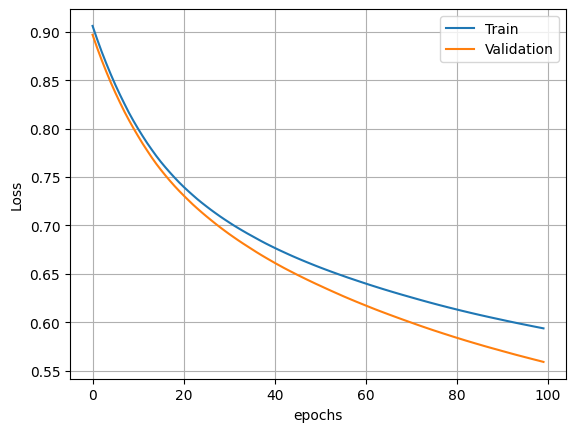

In [44]:
plt.plot(train_loss)
plt.plot(val_loss)
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend(['Train' , 'Validation'])
plt.grid()
plt.show()

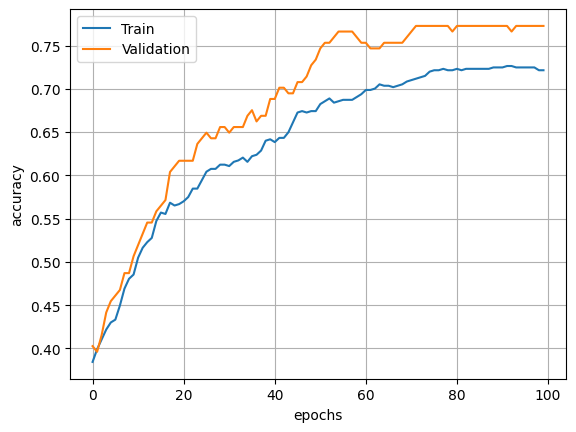

In [45]:
plt.plot(train_accuracy)
plt.plot(val_accuracy)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['Train' , 'Validation'])
plt.grid()
plt.show()

In [46]:
loss, accuracy = model.evaluate(x_test_scaled, y_test)
print("Test accuracy for Model A:", accuracy)

5/5 [==============================] - 0s 3ms/step - loss: 0.5590 - accuracy: 0.7727
Test accuracy for Model A: 0.7727272510528564


In [47]:
# B. Build another sequential model where ‘Outcome’ is the dependent variable and all
#    other columns are predictors.
#     a. This model should have 3 hidden layers with 16 nodes in each layer
#     b. Use ‘adam’ as the optimization algorithm
#     c. Fit the model, with number of epochs to be 150 and batch size to be 10

In [48]:
data = pd.read_csv('diabetes.csv')

In [49]:
data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [50]:
data.shape

(768, 9)

In [51]:
x = data.drop(['Outcome'] , axis =1)
y = data['Outcome']

In [52]:
x.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33

In [54]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.80, random_state = 0)

In [55]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [56]:
model = Sequential()

In [58]:
model.add(Dense(16 , activation = 'relu'))
model.add(Dense(16 , activation = 'relu'))
model.add(Dense(units = 16 , activation = 'relu'))
model.add((Dense(units = 1 , activation = 'sigmoid')))

In [59]:
from tensorflow.keras.optimizers import Adam

In [60]:
model.compile(optimizer = Adam(learning_rate = 0.001), loss = 'binary_crossentropy' ,metrics = ['accuracy'])

In [61]:
model.fit(x = x_train_scaled , y = y_train , epochs = 150 , batch_size = 10 , validation_data =(x_test_scaled , y_test))

Epoch 1/150
62/62 [==============================] - 4s 9ms/step - loss: 0.6811 - accuracy: 0.5879 - val_loss: 0.6436 - val_accuracy: 0.6948
Epoch 2/150
62/62 [==============================] - 0s 4ms/step - loss: 0.6094 - accuracy: 0.6547 - val_loss: 0.5168 - val_accuracy: 0.7792
Epoch 3/150
62/62 [==============================] - 0s 4ms/step - loss: 0.5290 - accuracy: 0.7280 - val_loss: 0.4774 - val_accuracy: 0.7468
Epoch 4/150
62/62 [==============================] - 0s 4ms/step - loss: 0.4937 - accuracy: 0.7541 - val_loss: 0.4665 - val_accuracy: 0.7532
Epoch 5/150
62/62 [==============================] - 0s 4ms/step - loss: 0.4723 - accuracy: 0.7704 - val_loss: 0.4521 - val_accuracy: 0.7792
Epoch 6/150
62/62 [==============================] - 0s 3ms/step - loss: 0.4679 - accuracy: 0.7785 - val_loss: 0.4565 - val_accuracy: 0.7792
Epoch 7/150
62/62 [==============================] - 0s 4ms/step - loss: 0.4574 - accuracy: 0.7866 - val_loss: 0.4750 - val_accuracy: 0.7922
Epoch 8/150
6

In [62]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 16)                144       
                                                                 
 dense_5 (Dense)             (None, 16)                272       
                                                                 
 dense_6 (Dense)             (None, 16)                272       
                                                                 
 dense_7 (Dense)             (None, 16)                272       
                                                                 
 dense_8 (Dense)             (None, 16)                272       
                                                                 
 dense_9 (Dense)             (None, 16)                272       
                                                                 
 dense_10 (Dense)            (None, 1)                

In [63]:
history = model.history.history

In [64]:
train_loss = history['loss']
train_accuracy = history['accuracy']
val_loss = history['val_loss']
val_accuracy = history['val_accuracy']

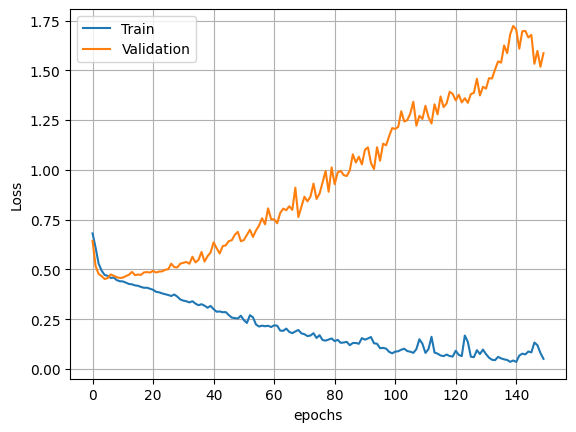

In [65]:
plt.plot(train_loss)
plt.plot(val_loss)
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend(['Train' , 'Validation'])
plt.grid()
plt.show()

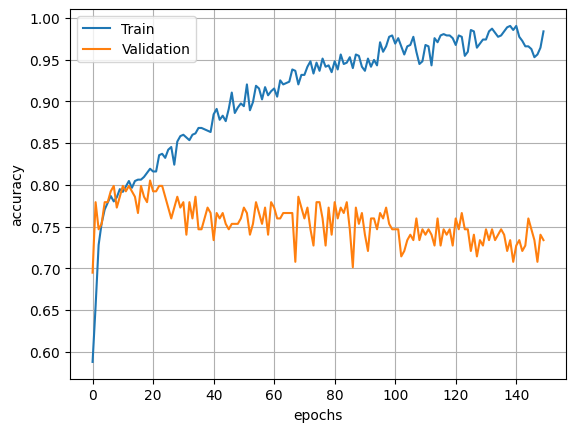

In [66]:
plt.plot(train_accuracy)
plt.plot(val_accuracy)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['Train' , 'Validation'])
plt.grid()
plt.show()

In [67]:
loss, accuracy = model.evaluate(x_test_scaled, y_test)
print("Test accuracy for Model A:", accuracy)

5/5 [==============================] - 0s 5ms/step - loss: 1.5862 - accuracy: 0.7338
Test accuracy for Model A: 0.7337662577629089
